<a href="https://colab.research.google.com/github/mozzaquatro/financial_market/blob/main/medias_moveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib
!pip install yfinance

     |████████████████████████████████| 6.3 MB 42.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import math

In [3]:
ticket = 'USIM5.SA'
#input_data = yf.download(ticket,period='1y').reset_index()
input_data = yf.download(ticket,period='2mo')

[*********************100%***********************]  1 of 1 completed


In [4]:
window = 20
MMS = f'SMA{window}'
window = 9
MME = f'EMA{window}'

In [5]:


def crossover_sinal(input_data, MMS, MME):
  # criar sinal compra e venda
  # Media Movel Simples - maior período
  
  
  input_data[MMS]=input_data['Adj Close'].rolling(window).mean()
  input_data.tail()
  # Media Movel Exponencial - menor período
  
  
  input_data[MME]=input_data['Adj Close'].ewm(span=window).mean()
  input_data.tail()

  input_data['Anter'] = input_data[MME].shift(1) - input_data[MMS].shift(1)
  input_data['Atual'] = input_data[MME] - input_data[MMS]

  input_data.loc[(input_data['Anter']<0)&(input_data['Atual']>0),'Compra'] = input_data['Adj Close']
  input_data.loc[(input_data['Anter']>0)&(input_data['Atual']<0),'Venda'] = input_data['Adj Close']

  columns = ['Close', 'Adj Close', MMS, MME, 'Compra', 'Venda']

  return input_data[columns]

In [6]:
output_df = crossover_sinal(input_data, MMS, MME)
output_df #.tail()

,Close,Adj Close,SMA20,EMA9,Compra,Venda
Date,,,,,,
2021-09-13,15.930000,15.930000,NaN,15.930000,NaN,NaN
2021-09-14,15.680000,15.680000,NaN,15.791111,NaN,NaN
2021-09-15,15.540000,15.540000,NaN,15.688197,NaN,NaN
2021-09-16,14.700000,14.700000,NaN,15.353442,NaN,NaN
2021-09-17,13.920000,13.920000,NaN,14.927025,NaN,NaN
2021-09-20,13.720000,13.720000,NaN,14.599854,NaN,NaN
2021-09-21,14.020000,14.020000,NaN,14.453109,NaN,NaN
2021-09-22,15.240000,15.240000,NaN,14.642214,NaN,NaN
2021-09-23,16.650000,16.650000,15.044445,15.106022,NaN,NaN


In [7]:
filtered_data = output_df.loc[(output_df.index<'2021-08-18') & (output_df.index>'2021-06-18')]

Text(0.5, 0, 'Data')

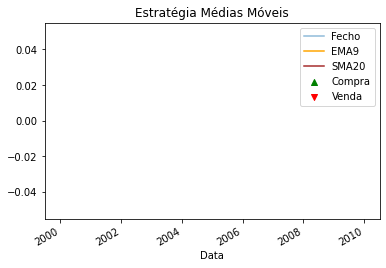

In [8]:
fig, ax = plt.subplots()

#Adicionar Informação
ax.plot(filtered_data.index,filtered_data['Close'],label='Fecho',alpha=0.5)
ax.plot(filtered_data.index,filtered_data[MME],label= MME, color='orange')
ax.plot(filtered_data.index,filtered_data[MMS],label= MMS,color='brown')

#Adicionar Venda e Compra
ax.scatter(filtered_data.index,filtered_data['Compra'],label='Compra',marker='^',color='green')
ax.scatter(filtered_data.index,filtered_data['Venda'],label='Venda',marker='v',color='red')


# formatar
fig.autofmt_xdate()
ax.legend()

#Labels adicionais

ax.set_title('Estratégia Médias Móveis')
ax.set_xlabel('Data')

In [9]:
# lucro
